# Boston Dataset

In [1]:
#loading data

from sklearn.datasets import load_boston

data = load_boston()

#converting to dataframe
import pandas as pd

df = pd.DataFrame(data = data.data , columns = data.feature_names)

df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [31]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [2]:
#getting target variable

target = data.target

#adding to the df

df['Median value'] = target

In [3]:
#checking the information

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Median value    0
dtype: int64

# EDA

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,10)

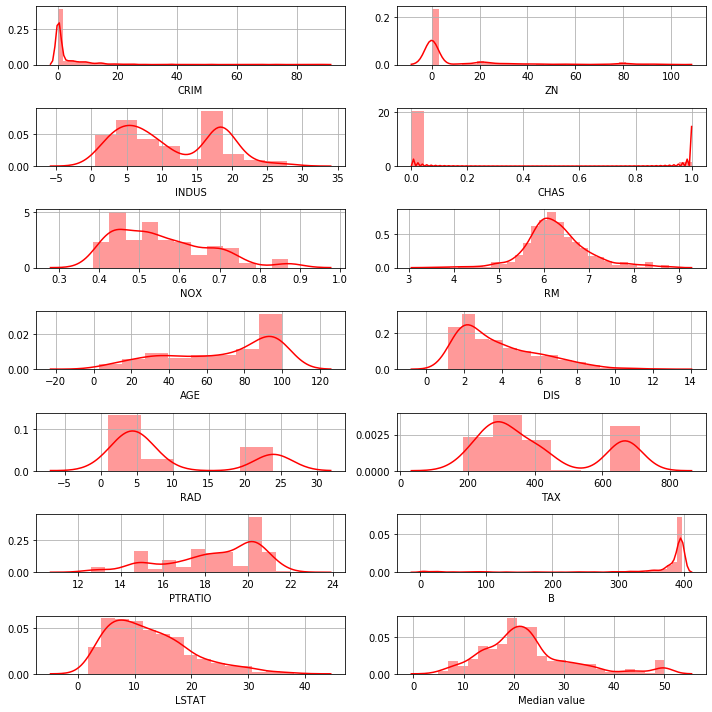

In [33]:
#distributions

for x, var in enumerate(list(df.columns.values)):
    plt.subplot(7,2,x+1)
    sns.distplot(df[var] , color='r' , kde=True)
    plt.grid()
    plt.tight_layout()

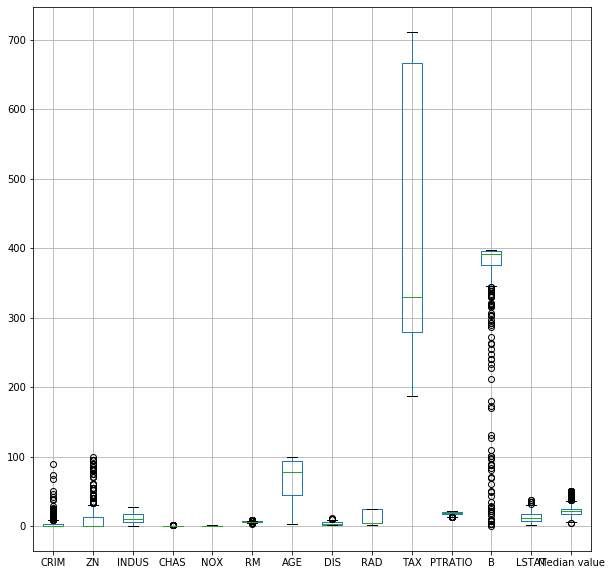

In [34]:
#Outlier detection
df.boxplot()

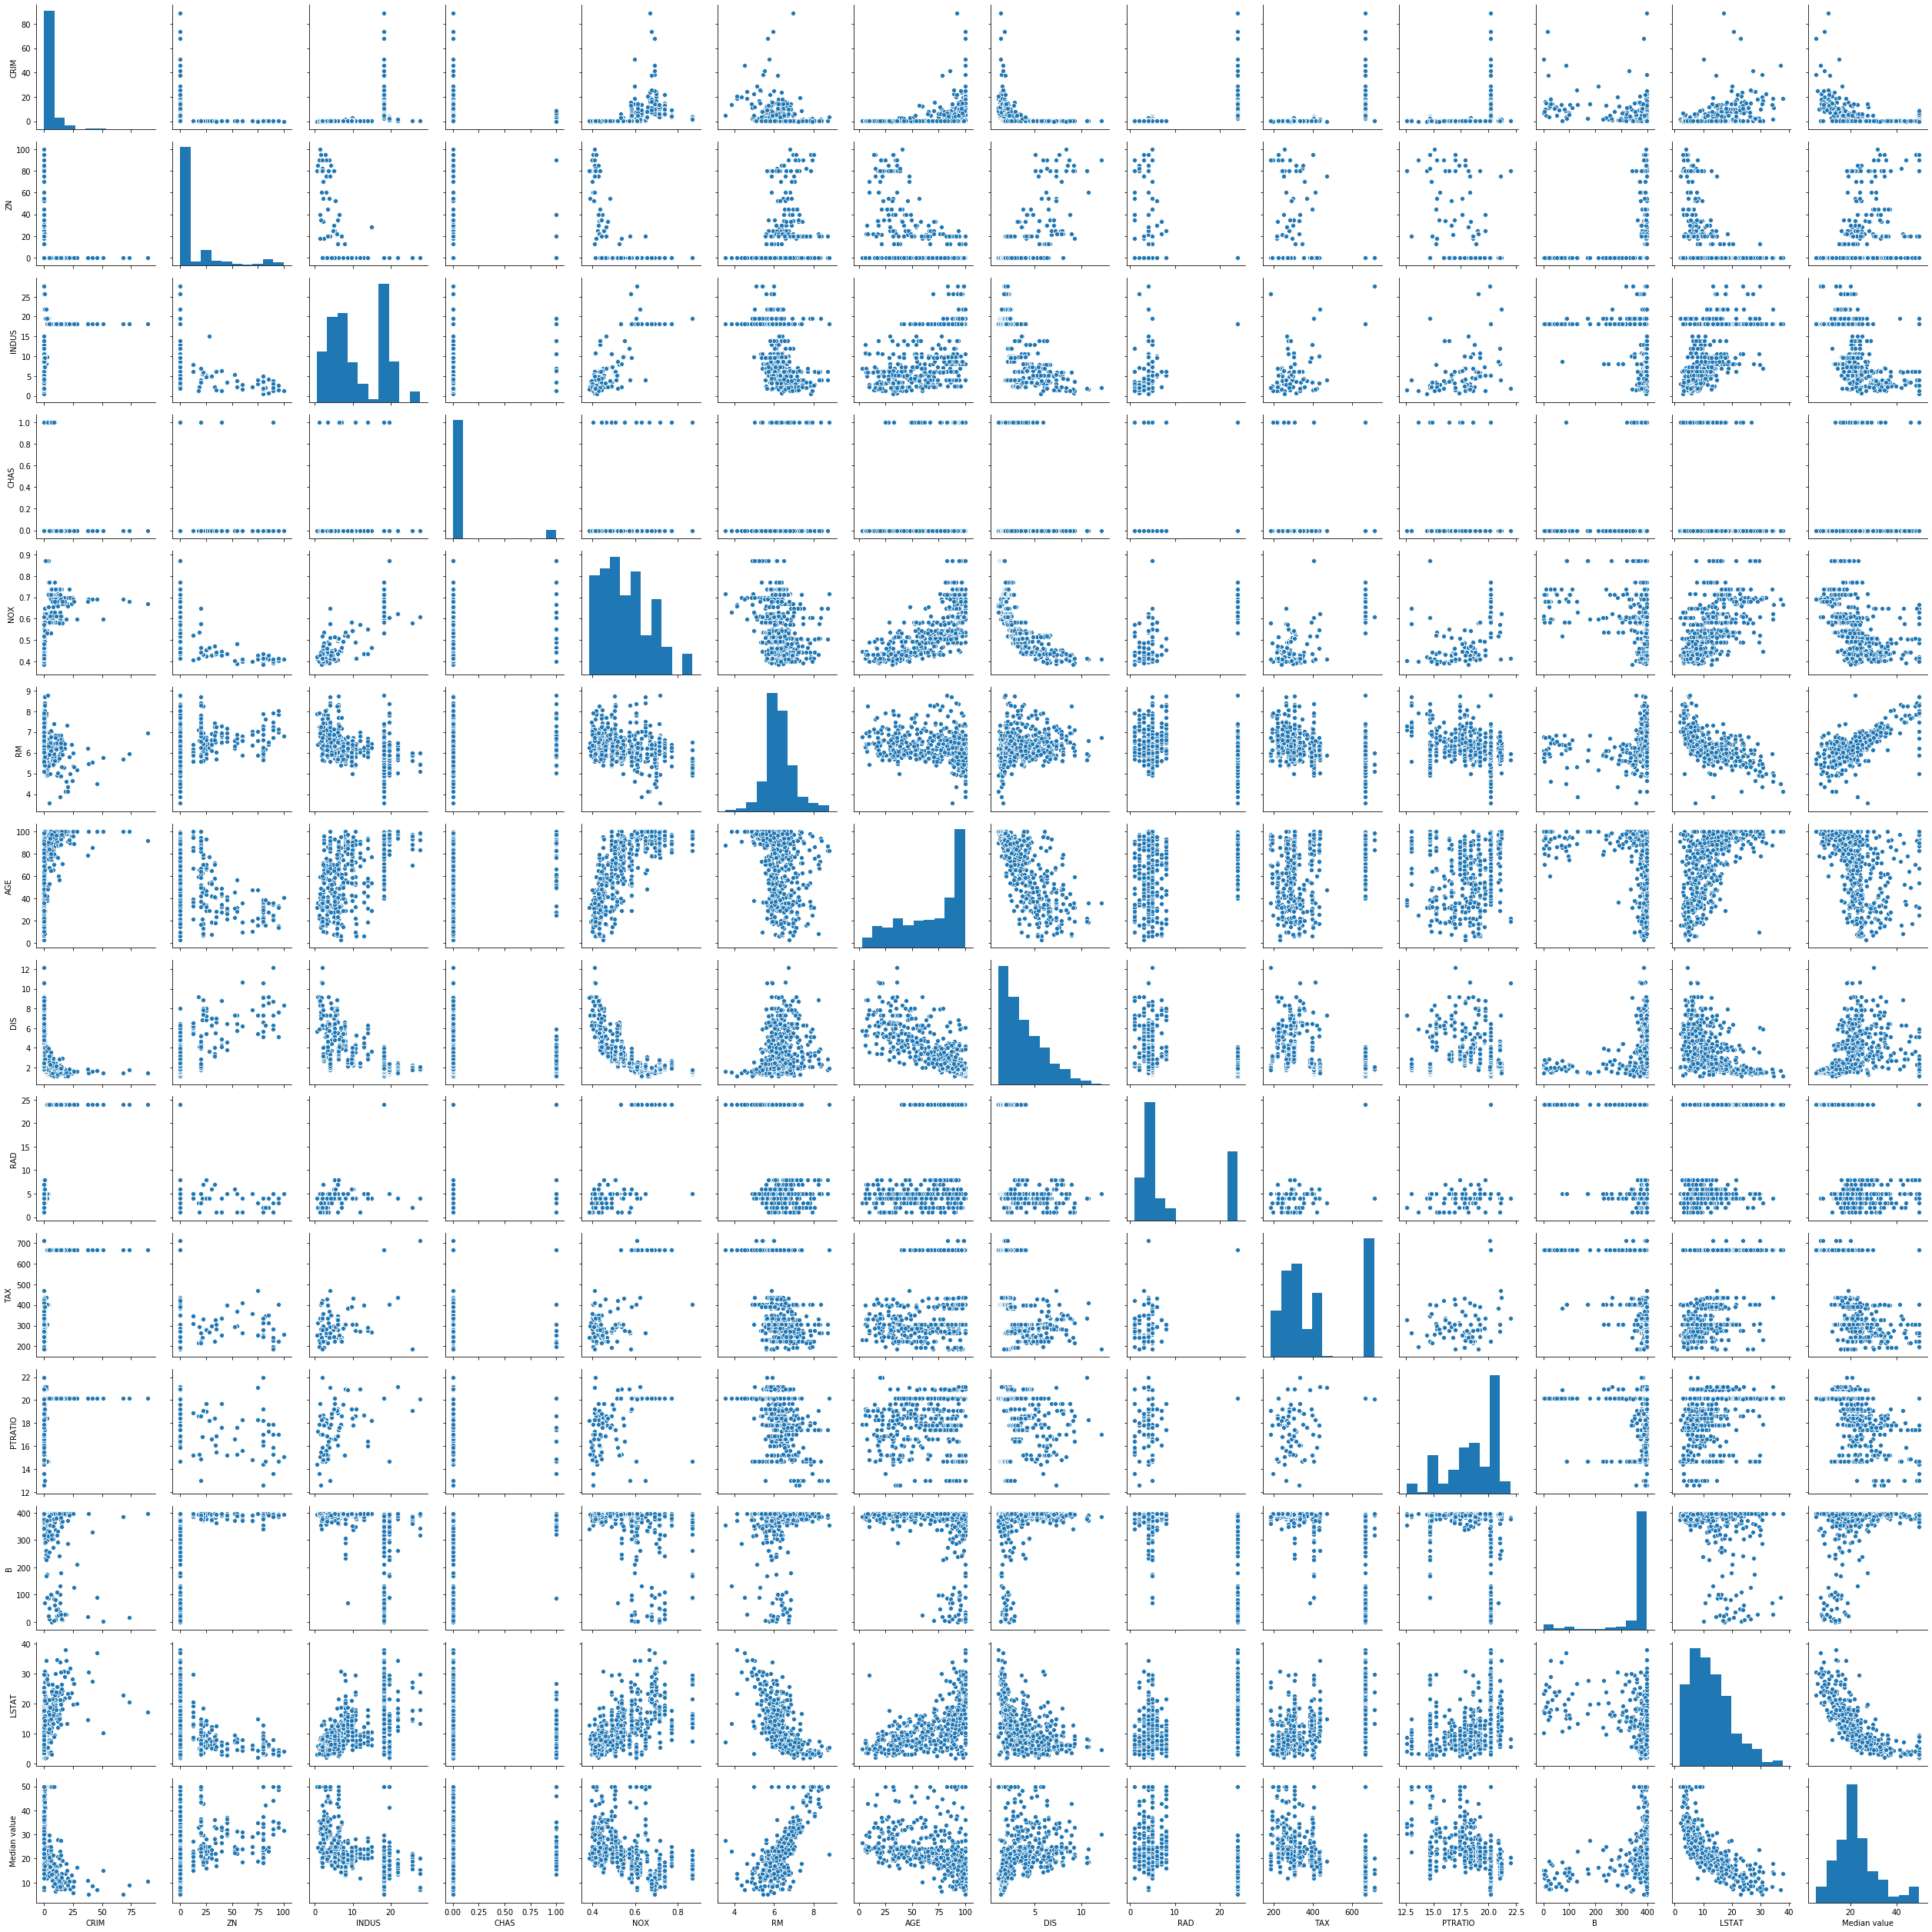

In [8]:
#pairplot
sns.pairplot(df)
plt.tight_layout()

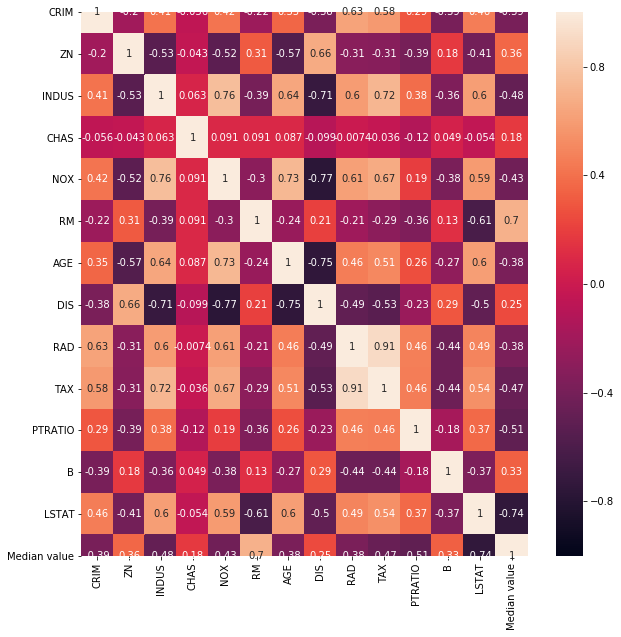

In [41]:
cor = df.corr()
sns.heatmap(cor, annot=True , vmin=-1, vmax=1)
plt.show()

# Modelling

# Linear Regression

In [11]:
#storing

X = data.data
y = data.data

#split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3)

lr = LinearRegression()

lr.fit(X_train , y_train)

lr_preds = lr.predict(X_test)

#metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

print(f'RMSE_Linear_Reg: {np.sqrt(mse(lr_preds , y_test))}')
print(f'R2_score:{r2_score(X_test, y_test)}')

RMSE_Linear_Reg: 1.0331371875459491e-13
R2_score:1.0


In [30]:
lin_reg_coefficients = lr.coef_[0]

coef_df = pd.DataFrame(lin_reg_coefficients , data.feature_names)

coef_df.head(10)

,0
CRIM,1.000000e+00
ZN,-4.176266e-16
INDUS,8.752178e-17
CHAS,-3.718944e-16
NOX,4.148973e-15
RM,5.143451e-16
AGE,-4.184735e-16
DIS,1.935901e-17
RAD,-2.936874e-17
TAX,1.990797e-17


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(max_depth=np.random.choice([2,3]))

tree.fit(X_train,y_train)

tree_params = dict(max_depth = range(2,10,2) , min_samples_split = [2,4,6,8,10])

tree_grid = GridSearchCV(tree , tree_params , cv=5, n_jobs=2 , verbose=1)

tree_grid.fit(X_train  ,y_train)

print(f'Best Score of the tree:{tree_grid.best_score_}')
print(f'Best estimator of the tree:{tree_grid.best_estimator_}')


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Score of the tree:0.9834455864464111
Best estimator of the tree:DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished


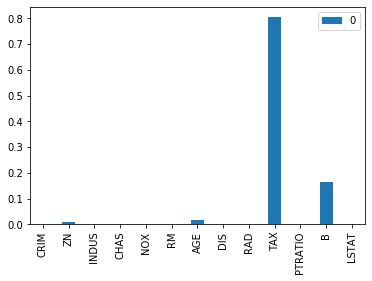

In [13]:
features = data.feature_names.tolist()

imp_features = tree_grid.best_estimator_.feature_importances_

feature_df = pd.DataFrame(imp_features , features)

feature_df.plot(kind='bar')

In [14]:
tree_grid.score(X_test , y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9841044724480528

# Random Forests

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_tree  = RandomForestRegressor()

rf_params = dict(max_depth=range(2,10,2) , min_samples_split=[2,4,6,8,10] )

rf_grid = GridSearchCV( rf_tree , rf_params , cv=5 , n_jobs=2 , verbose=True)

rf_grid.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=2,
             param_grid={'max_depth': range(2, 10, 2),
    

In [20]:
rf_preds = rf_grid.predict(X_test)

In [22]:
print(f'Best Score:{rf_grid.best_score_}')
print(f'RMSE score:{np.sqrt(mse(rf_preds , y_test))}')
print(f'Best estimator: {rf_grid.best_estimator_}')

Best Score:0.98780877701877
RMSE score:7.2829854228351785
Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


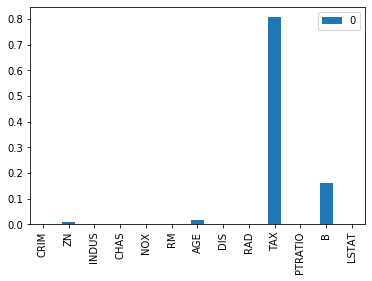

In [23]:
rf_features = rf_grid.best_estimator_.feature_importances_

rf_df = pd.DataFrame(rf_features , features)
rf_df.plot(kind='bar')